In [1]:
import pandas as pd
from collections import defaultdict

#đọc dữ liệu từ file excel
df1 = pd.read_excel('output.xlsx')

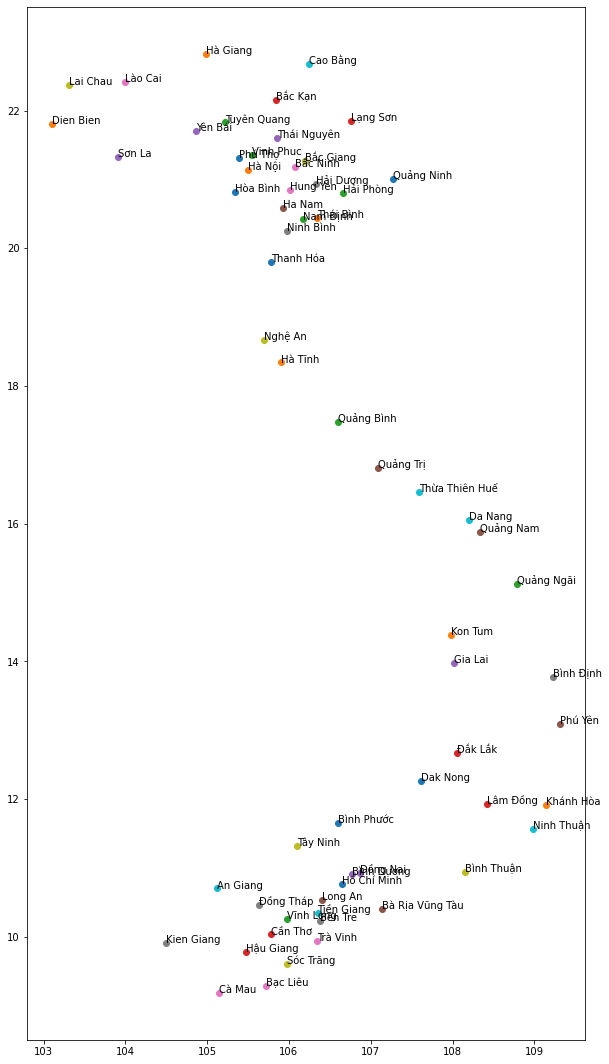

In [2]:
import matplotlib.pyplot as plt
import numpy as np

latitude = df1['Unnamed: 64']
longtitude = df1['Unnamed: 65']
province = df1['Unnamed: 0']
fig,axes = plt.subplots(figsize = (10,19))
for i in range (1,len(latitude)):
    axes.scatter(longtitude[i], latitude[i])
    axes.text(longtitude[i], latitude[i],province[i])

In [3]:
import pandas as pd
from collections import defaultdict
import time
from queue import PriorityQueue

n = int(input('n='))
start_time = time.time()
#read data from excel file
df1 = pd.read_excel('output.xlsx')

#initial begin warehouse and end warehouse
begin = str(input('begin:'))
end = str(input('end:'))

for i in range(len(df1)):
    if df1.iloc[i][0] == begin:
        begin_id = i
    if df1.iloc[i][0] == end:
        end_id = i

#tạo bộ dữ liệu để xử lý
data = defaultdict(list) #khởi tạo bộ dữ liệu
over = []
for i in range (1,len(df1)):#duyệt từng thành phố từ trên xuống để tìm thành phố lân cận
    lst = []
    
    # thêm những thành phố lân cận nếu khoảng cách lớn hơn 0, bé hơn a( ở đây a=130)
    for j in range(1,len(df1)):
        if 0 < df1.iloc[i][j] < n:
            lst.append(df1.iloc[0][j])
            lst.append(df1.iloc[i][j])
            
    # thêm chỉ số heuristic (h(x)), là khoảng cách chim bay từ điểm đang xét đến điểm end
    lst.append(df1.iloc[i][end_id])
    #thêm vào data
    data[str(df1.iloc[i][0])] = lst

n=150
begin:Hà Nội
end:Quảng Bình


In [4]:
#initial node object
class node():
    def __init__(self,name = None,par = None, h= 0, g = 0, w = 0):
        self.name = name
        self.h = h     #h(x) of each node saved at the end of the list in the data set, distance from current node to goal node
        self.g = g     #g(x): distance from start node to current node
        self.par = par #parent of current node
        self.w = w     #distance from current node to it's parent
        
    #"less than" function,this function is used to compare the node's f(x) function 
    #to add to the PriorityQueue in order of priority, the smaller f(x) will be added first
    def __lt__(self,other): 
        if other == None:
            return False
        else:
            return self.h+self.g < other.h + other.g     #in A* algorithm, f(x) = h(x) + g(x)
        
    #used to trace the path after finding the solution
    def parent(self, distance, last_h): 
        print(self.name)
        distance += self.w
        if self.par != None: #other nodes except start warehouse
            return self.par.parent(distance, last_h)
        else: #this is the start warehouse, it doesn't have parent node 
            print('distance: ',distance + last_h)
            

In [5]:
#AStar function
#How it works???
'''
PriorityQueue is a queue that add element in order of priority, that means in this algorithm, the smaller node ( smaller f(x)) will added first.
E.g: [3,6,9] are the f(x) function of 3 nodes, if we add 2 nodes with f(x) are 4 and 8, the PriorityQueue will become [3,4,6,8,9]
step 1: initial open, closed are PriorityQueue
    +open queue contains unexpanded nodes
    +closed queue contains expanded nodes
step 2: expand nodes in open queue, if child node not in open queue and not in closed queue => add to open queue and expand later
        (in this program, we call expanding node is O)
step 3: if we find out goal node, break the program and print solution
        if not, return to step 2
        if open queue is empty and we haven't found goal node ==> error, can't find solution 
'''
def AStar(S = node(begin), G = node(end)):
    #initial open queue and closed queue
    open = PriorityQueue()
    closed = PriorityQueue()
    #add start node to open queue to start expand
    S.h = data[S.name][-1]
    S.g = 0
    open.put(S)
    
    while True:
        if open.empty():
            print("can't solve")
            break
        else:
            O = open.get(0)    #take out each element in the open queue and expand
            closed.put(O)      #put expanded nodes to closed, so that these nodes are not expanded again
            O.h = data[O.name][-1]
            print('duyet',O.name, O.h, O.g)
            if O.name == G.name:   #finding the solution
                print('solve successfully')
                last = data[G.name][-1]
                print(O.parent(distance = 0,last_h = last))   #print path after solving
                break
            else:
                for i in range (0,len(data[O.name])-1,2):  #browse all elements of node O
                    tmp = node(data[O.name][i])
                    tmp.h = data[tmp.name][-1]             
                    tmp.g = O.g + data[O.name][i+1]        
                    tmp.w = data[O.name][i+1]              
                    tmp.par = O
                    
                    if tmp not in open.queue and tmp not in closed.queue:
                        open.put(tmp)
                        
#print dataset
'''
for i in range(1,len(df1)):
    print('data[',df1.iloc[i][0],end = ']=')
    print(data[str(df1.iloc[i][0])])
print()
'''

AStar()
#print time complexity
print('time: ',time.time()- start_time,'s')

duyet Hà Nội 422.4640015021052 0
duyet Ninh Bình 315.1143868324131 109.8470328139515
duyet Ha Nam 352.1057866874436 75.45833322162113
duyet Ninh Bình 315.1143868324131 112.52072109352349
duyet Hòa Bình 393.8653416578599 39.6871885158106
duyet Thanh Hóa 272.700882228534 160.99980064250428
duyet Nam Định 329.7897090446579 105.5451349304166
duyet Thanh Hóa 272.700882228534 163.12095901107475
duyet Thanh Hóa 272.700882228534 163.66287733756192
duyet Nam Định 329.7897090446579 106.82728587109165
duyet Thanh Hóa 272.700882228534 166.3365656171339
duyet Hung Yen 379.7341015809155 61.93742826475109
duyet Nam Định 329.7897090446579 112.56427992441948
duyet Ninh Bình 315.1143868324131 128.6710064465198
duyet Ha Nam 352.1057866874436 93.42146667095358
duyet Ninh Bình 315.1143868324131 130.48385454285594
duyet Ninh Bình 315.1143868324131 131.0065865774885
duyet Thái Bình 330.6653126453904 116.2111342585684
duyet Ninh Bình 315.1143868324131 132.89070608402974
duyet Thái Bình 330.6653126453904 118.4